## importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

## import data

In [2]:
file_path = 'C:/Data_set/'

In [3]:
customers = pd.read_csv(file_path+'CUSTOMERS.csv')
sellers = pd.read_csv(file_path+'SELLERS.csv')
products = pd.read_csv(file_path+'PRODUCTS.csv')
orders = pd.read_csv(file_path+'ORDERS.csv')
order_items = pd.read_csv(file_path+'ORDER_ITEMS.csv')
order_payments = pd.read_csv(file_path+'ORDER_PAYMENTS.csv')
order_review_ratings = pd.read_csv(file_path+'ORDER_REVIEW_RATINGS.csv')
geo_location = pd.read_csv(file_path+'GEO_LOCATION.csv')

In [4]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['count_Num', 'Num_MISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var','lc_iqr', 'uc_iqr','min',
                             'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

## customers_Data_Inspection

In [6]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customers.astype('category').apply(categorical_var_summary)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count_Num,99441,99441,99441.00,99441,99441
Num_MISS,0,0,0.00,0,0
MODE,00012a2ce6f8dcda20d059ce98491703,8d50f5eadf50201ccdcedfb9e2ac8455,22790.00,Akkarampalle,Andhra Pradesh
FREQ,1,17,142.00,15540,60688
PERCENT,0.0,0.02,0.14,15.63,61.03


In [9]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
customers[customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


## sellers_Data_Inspection

In [11]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [12]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [13]:
sellers.isnull().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [14]:
sellers.fillna( value={'seller_city':'Koratla', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Chhuikhadan', 'seller_state':'Chhattisgarh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Adoni', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkayapalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Badepalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Chunchupalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Rajendranagar', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Manasa', 'seller_state':'Madhya Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Bannur', 'seller_state':'Karnataka'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Anantapur', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Baragaon', 'seller_state':'Uttar Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Badepalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Saraipali', 'seller_state':'Chhattisgarh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Okha port', 'seller_state':'Gujarat'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Adoni', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Nuh', 'seller_state':'Haryana'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Adoni', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Secunderabad', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Bestavaripeta', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Chirala', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Kallur', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Jagadhri', 'seller_state':'Haryana'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Pattanagere', 'seller_state':'Karnataka'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Jarjapupeta', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Kanker', 'seller_state':'Chhattisgarh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Siddipet', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Jairampur', 'seller_state':'Arunachal Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Khariar', 'seller_state':'Orissa'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Eddumailaram', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Chandla', 'seller_state':'Madhya Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Chirala', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Eddumailaram', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Jairampur', 'seller_state':'Arunachal  Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Nizamabad', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Akkarampalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Badepalle', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Libas Pur', 'seller_state':'Delhi'},inplace=True,limit=1)
sellers.fillna( value={'seller_city':'Chirala', 'seller_state':'Andhra Pradesh'},inplace=True,limit=1)

In [15]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [16]:
sellers.astype('category').apply(categorical_var_summary)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count_Num,3095,3095.00,3095,3095
Num_MISS,0,0.00,0,0
MODE,0015a82c2db000af6aaaf3ae2ecb0532,14940.00,Akkarampalle,Andhra Pradesh
FREQ,1,49.00,719,2102
PERCENT,0.03,1.58,23.23,67.92


In [17]:
sellers[sellers.duplicated()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


## products_Data_Inspection

In [18]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
products.isnull().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
products[products.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [22]:
products.product_category_name.fillna(products.product_category_name.mode()[0], inplace=True)
products.product_name_lenght.fillna(products.product_name_lenght.mean(), inplace=True)
products.product_description_lenght.fillna(products.product_description_lenght.mean(), inplace=True)
products.product_photos_qty.fillna(products.product_photos_qty.mean(), inplace=True)
products.product_weight_g.fillna(products.product_weight_g.mean(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.mean(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.mean(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.mean(), inplace=True)

In [23]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [24]:
products[products.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


## orders_Data_Inspection

In [25]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')

In [28]:
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at, format='%m/%d/%Y %H:%M')

In [29]:
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date, format = '%m/%d/%Y %H:%M')

In [30]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date, format = '%m/%d/%Y %H:%M')

In [31]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date, format = '%m/%d/%Y %H:%M')

In [32]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15


In [33]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [34]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [35]:
orders[orders.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:00,2017-04-13 13:25:00,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:00,2018-06-05 04:31:00,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:00,2018-08-07 06:15:00,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:00,2017-09-03 14:30:00,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:00,2018-01-11 02:32:00,2018-01-11 19:39:00,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:00,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:00,2018-01-09 07:18:00,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:00,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:00,2017-08-28 15:44:00,NaT,NaT,2017-09-15


In [36]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [37]:
orders.astype('category').apply(categorical_var_summary)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count_Num,99441,99441,99441,99441,99281,97658,96476,99441
Num_MISS,0,0,0,0,160,1783,2965,0
MODE,00010242fe8c5a6d1ba2dd792cb16214,00012a2ce6f8dcda20d059ce98491703,delivered,2018-08-02 12:06:00,2018-01-10 10:32:00,2018-05-09 15:48:00,2017-12-11 18:52:00,2017-12-20 00:00:00
FREQ,1,1,96478,28,109,47,7,522
PERCENT,0.0,0.0,97.02,0.03,0.11,0.05,0.01,0.52


In [38]:
orders[ orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


## Order_Items_Data_Inspection

In [39]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [40]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [41]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [42]:
order_items[['price', 'freight_value']].apply(continuous_var_summary)

,price,freight_value
dtype,float64,float64
cardinality,5968,6999
n_tot,112650,112650
n,112650,112650
nmiss,0,0
perc_miss,0.0,0.0
sum,13591643.7,2251909.54
mean,120.653739,19.99032
std,183.633928,15.806405
var,33721.419531,249.842452


In [43]:
order_items['shipping_limit_date']=pd.to_datetime(order_items.shipping_limit_date, format='%m/%d/%Y %H:%M')

In [44]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.9,19.93


In [45]:
order_items[order_items.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


## Order_Payments_Data_Inspection

In [46]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [47]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [48]:
order_payments[order_payments.duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


## Order_Review_Ratings_Data_Inspection

In [49]:
order_review_ratings

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [50]:
order_review_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [51]:
order_review_ratings['review_creation_date'] = pd.to_datetime(order_review_ratings.review_creation_date,
                                                             format='%m/%d/%Y %H:%M')

In [52]:
order_review_ratings['review_answer_timestamp'] = pd.to_datetime(order_review_ratings.review_answer_timestamp,
                                                             format='%m/%d/%Y %H:%M')

In [53]:
order_review_ratings

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:00
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-12-11 20:06:00
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-03-23 09:10:00
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-07-02 12:59:00
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,2017-12-15,2017-12-16 01:29:00


In [54]:
order_review_ratings[order_review_ratings.duplicated()]

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp


## Geo_Location_Data_Inspection

In [55]:
geo_location

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [56]:
geo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [57]:
geo_location[geo_location.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [58]:
list(customers.columns)   

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

In [59]:
list(sellers.columns)

['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

In [60]:
list(products.columns)

['product_id',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [61]:
list(orders.columns)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [62]:
list(order_items.columns)

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value']

In [63]:
list(order_payments.columns)

['order_id',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value']

In [64]:
list(order_review_ratings.columns)

['review_id',
 'order_id',
 'review_score',
 'review_creation_date',
 'review_answer_timestamp']

In [65]:
list(geo_location.columns)

['geolocation_zip_code_prefix',
 'geolocation_lat',
 'geolocation_lng',
 'geolocation_city',
 'geolocation_state']

In [66]:
orderr=pd.merge(left=orders,
        right=order_payments,
        how='outer',
        left_on='order_id',
        right_on='order_id')

In [67]:
co=pd.merge(left=orderr,
        right=customers,
        how='outer',
        left_on='customer_id',
        right_on='customer_id')

## 1 Perform Detailed exploratory analysis

# a

### Total Revenue

In [68]:
orderr=pd.merge(left=orders,
        right=order_payments,
        how='outer',
        left_on='order_id',
        right_on='order_id')

In [69]:
print('Total_Revenue:', orderr.payment_value.sum())

Total_Revenue: 16008872.12


### Total quantity

In [70]:
po=pd.merge(left=order_items,
        right=products,
        how='outer',
        left_on='product_id',
        right_on='product_id')

In [71]:
print('Total_quantity:', po.product_photos_qty.sum())

Total_quantity: 248890.9447450605


### Total products

In [72]:
po.product_category_name.value_counts()

Bed_Bath_Table               12742
Health_Beauty                 9670
Sports_Leisure                8641
Furniture_Decor               8334
Computers_Accessories         7827
                             ...  
Arts_And_Craftmanship           24
Cds_Dvds_Musicals               14
La_Cuisine                      14
Fashion_Childrens_Clothes        8
Security_And_Services            2
Name: product_category_name, Length: 71, dtype: int64

### Total categories

In [73]:
print('Total categories:',po.product_category_name.nunique())

Total categories: 71


### Total sellers

In [74]:
so=pd.merge(left=order_items,
        right=sellers,
        how='outer',
        left_on='seller_id',
        right_on='seller_id')

In [75]:
print('Total sellers:', order_items.seller_id.nunique())

Total sellers: 3095


### Total locations

In [76]:
print('Total locations:', customers.customer_zip_code_prefix.nunique())

Total locations: 14994


### Total channels

In [77]:
orderr.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

### Total payment methods

In [78]:
print('Total payment methods:', orderr.payment_type.nunique())

Total payment methods: 5


# b Understanding how many new customers acquired every month

In [79]:
ncust = pd.merge(left=orders, 
         right=customers,
         how='outer',
         left_on='customer_id',
         right_on='customer_id')

In [80]:
ncust['order_month'] = ncust.order_purchase_timestamp.dt.month

In [81]:
ncust['order_year'] = ncust.order_purchase_timestamp.dt.year

In [82]:
ncust

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_month,order_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,Bobbili,Andhra Pradesh,3,2017
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,Mahendragarh,Haryana,2,2018
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,Bidasar,Rajasthan,8,2017
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab,1,2018


In [83]:
pd.crosstab(index=ncust.customer_unique_id, 
            columns=[ncust.order_year, ncust.order_month ], 
            values=ncust.customer_unique_id, aggfunc='count')

order_year                       2016         2017                          \
order_month                        9   10  12   1    2    3   4    5    6    
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2  NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f  NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN   
0000f46a3911fa3c0805444483337064  NaN NaN NaN  NaN  NaN  1.0 NaN  NaN  NaN   
0000f6ccb0745a6a4b88665a16c9f078  NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN   
0004aac84e0df4da2b147fca70cf8255  NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN   
...                               ...  ..  ..  ...  ...  ...  ..  ...  ...   
fffcf5a5ff07b0908bd4e2dbc735a684  NaN NaN NaN  NaN  NaN  NaN NaN  NaN  1.0   
fffea47cd6d3cc0a88bd621562a9d061  NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN   
ffff371b4d645b6ecea244b27531430a  NaN NaN NaN  NaN  1.0  NaN NaN  NaN  NaN   
ffff5962728ec6157033ef9805bacc48  NaN NaN NaN  NaN  NaN  NaN NaN  NaN  NaN   
ffffd2657e2aad2907e67c3e9daecbeb  NaN NaN NaN  NaN  NaN  NaN NaN  1.0  NaN   

order_year                            ... 2018                               \
order_month                       7   ...   1   2   3   4    5   6   7   8    
customer_unique_id                    ...                                     
0000366f3b9a7992bf8c76cfdf3221e2 NaN  ...  NaN NaN NaN NaN  1.0 NaN NaN NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f NaN  ...  NaN NaN NaN NaN  1.0 NaN NaN NaN   
0000f46a3911fa3c0805444483337064 NaN  ...  NaN NaN NaN NaN  NaN NaN NaN NaN   
0000f6ccb0745a6a4b88665a16c9f078 NaN  ...  NaN NaN NaN NaN  NaN NaN NaN NaN   
0004aac84e0df4da2b147fca70cf8255 NaN  ...  NaN NaN NaN NaN  NaN NaN NaN NaN   
...                               ..  ...  ...  ..  ..  ..  ...  ..  ..  ..   
fffcf5a5ff07b0908bd4e2dbc735a684 NaN  ...  NaN NaN NaN NaN  NaN NaN NaN NaN   
fffea47cd6d3cc0a88bd621562a9d061 NaN  ...  NaN NaN NaN NaN  NaN NaN NaN NaN   
ffff371b4d645b6ecea244b27531430a NaN  ...  NaN NaN NaN NaN  NaN NaN NaN NaN   
ffff5962728ec6157033ef9805bacc48 NaN  ...  NaN NaN NaN NaN  1.0 NaN NaN NaN   
ffffd2657e2aad2907e67c3e9daecbeb NaN  ...  NaN NaN NaN NaN  NaN NaN NaN NaN   

order_year                                
order_month                       9   10  
customer_unique_id                        
0000366f3b9a7992bf8c76cfdf3221e2 NaN NaN  
0000b849f77a49e4a4ce2b2a4ca5be3f NaN NaN  
0000f46a3911fa3c0805444483337064 NaN NaN  
0000f6ccb0745a6a4b88665a16c9f078 NaN NaN  
0004aac84e0df4da2b147fca70cf8255 NaN NaN  
...                               ..  ..  
fffcf5a5ff07b0908bd4e2dbc735a684 NaN NaN  
fffea47cd6d3cc0a88bd621562a9d061 NaN NaN  
ffff371b4d645b6ecea244b27531430a NaN NaN  
ffff5962728ec6157033ef9805bacc48 NaN NaN  
ffffd2657e2aad2907e67c3e9daecbeb NaN NaN  

[96096 rows x 25 columns]

In [84]:
new_customers=pd.DataFrame(pd.crosstab(index=ncust.customer_unique_id, 
            columns=[ncust.order_year, ncust.order_month ], 
            values=ncust.customer_unique_id, aggfunc='count').notna().sum()).reset_index()

In [85]:
new_customers.rename(columns={0:'No_of_New_customers'}, inplace=True)

In [86]:
new_customers

,order_year,order_month,No_of_New_customers
0,2016,9,4
1,2016,10,321
2,2016,12,1
3,2017,1,765
4,2017,2,1755
5,2017,3,2642
6,2017,4,2372
7,2017,5,3625
8,2017,6,3180
9,2017,7,3947


# C Understand the retention of customers on month on month basis


In [87]:
total_cust=pd.DataFrame(ncust.groupby(['order_year', 'order_month'])
             ['customer_id'].count()).reset_index()

In [88]:
total_cust['No_of_New_customers']=new_customers.No_of_New_customers

In [89]:
total_cust['retention_of_customers']=total_cust.customer_id - total_cust.No_of_New_customers

In [90]:
total_cust.rename(columns={'customer_id': ' Total_customers'}, inplace=True)

In [91]:
total_cust

,order_year,order_month,Total_customers,No_of_New_customers,retention_of_customers
0,2016,9,4,4,0
1,2016,10,324,321,3
2,2016,12,1,1,0
3,2017,1,800,765,35
4,2017,2,1780,1755,25
5,2017,3,2682,2642,40
6,2017,4,2404,2372,32
7,2017,5,3700,3625,75
8,2017,6,3245,3180,65
9,2017,7,4026,3947,79


# d, How the revenues from existing/new customers on month on month basis

In [92]:
rec=pd.merge(left=order_payments,
        right=orders,
        how='outer',
        left_on='order_id',
        right_on='order_id',
        indicator=True)

In [93]:
rec['month']=rec.order_purchase_timestamp.dt.month

In [94]:
rec['year']=rec.order_purchase_timestamp.dt.year

In [95]:
## revenues from existing/new customers on month on month basis
pd.DataFrame(rec.groupby(['year', 'month' ])['payment_value'].sum())

payment_value
year month               
2016 9             252.24
     10          59090.48
     12             19.62
2017 1          138488.04
     2          291908.01
     3          449863.60
     4          417788.03
     5          592918.82
     6          511276.38
     7          592382.92
     8          674396.32
     9          727762.45
     10         779677.88
     11        1194882.80
     12         878401.48
2018 1         1115004.18
     2          992463.34
     3         1159652.12
     4         1160785.48
     5         1153982.15
     6         1023880.50
     7         1066540.75
     8         1022425.32
     9            4439.54
     10            589.67

In [96]:
## represnting graphically

In [97]:
rr=pd.DataFrame(rec.groupby(['year', 'month'])['payment_value'].sum())

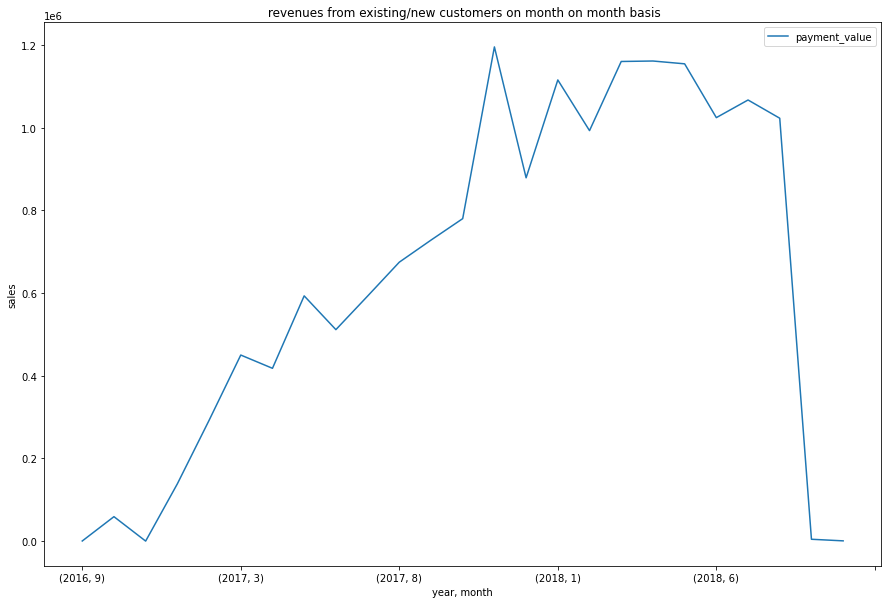

In [98]:
rr.plot(kind='line', 
        legend = True, 
        figsize = (15,10), 
        xlabel='year, month', 
        ylabel='sales', title=' revenues from existing/new customers on month on month basis')
plt.show()

# E, Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method

In [99]:
a=pd.merge(left=orders,
        right=order_items,
        how='outer',
        left_on='order_id',
        right_on='order_id')

In [100]:
a.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:00,118.70,22.76


In [101]:
b=pd.merge(left=a,
        right=order_payments,
        how='outer',
        left_on='order_id',
        right_on='order_id')

In [102]:
b.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,3.0,voucher,1.0,2.00


In [103]:
c = pd.merge(left=b,
        right=products,
        how='outer',
        left_on='product_id',
        right_on='product_id')

In [104]:
c.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,1.0,18.12,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,1.0,2.00,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [105]:
efin=pd.merge(left=c,
        right=customers,
        how='outer',
        left_on='customer_id',
        right_on='customer_id')

In [106]:
efin

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-17 15:28:00,2017-08-18 14:44:00,2017-08-28,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,Akkarampalle,Andhra Pradesh
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,2017-08-02 18:43:00,2017-08-04 17:35:00,2017-08-07 18:30:00,2017-08-15,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:00,2017-08-10 21:35:00,2017-08-18 16:42:00,2017-08-23 15:36:00,2017-08-31,1.0,0df37da38a30a713453b03053d60d3f7,...,1105.0,1.0,2800.0,28.0,23.0,23.0,fb9310710003399b031add3e55f34719,3318,Akkarampalle,Andhra Pradesh
118430,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:00,2017-08-10 21:35:00,2017-08-18 16:42:00,2017-08-23 15:36:00,2017-08-31,2.0,0df37da38a30a713453b03053d60d3f7,...,1105.0,1.0,2800.0,28.0,23.0,23.0,fb9310710003399b031add3e55f34719,3318,Akkarampalle,Andhra Pradesh
118431,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:00,2017-12-20 10:09:00,2017-12-20 20:25:00,2018-01-26 15:45:00,2018-01-18,1.0,3d2c44374ee42b3003a470f3e937a2ea,...,372.0,2.0,300.0,16.0,6.0,12.0,a49e8e11e850592fe685ae3c64b40eca,83870,Aminagar Urf Bhurbaral,Uttar Pradesh
118432,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,1.0,ac35486adb7b02598c182c2ff2e05254,...,1517.0,1.0,1175.0,22.0,13.0,18.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,Bobbili,Andhra Pradesh


In [107]:
efin['year']=efin.order_purchase_timestamp.dt.year

In [108]:
efin['month']=efin.order_purchase_timestamp.dt.month

In [109]:
efin['week']=efin.order_purchase_timestamp.dt.week

C:\Users\Mantu\AppData\Local\Temp/ipykernel_11100/1067050593.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  efin['week']=efin.order_purchase_timestamp.dt.week


In [110]:
efin['day']=efin.order_purchase_timestamp.dt.day

In [111]:
efin['time']=efin.order_purchase_timestamp.dt.time

In [112]:
list(efin.columns)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'year',
 'month',
 'week',
 'day',
 'time']

In [113]:
efin.groupby(['product_category_name', 
              'customer_state',
              'year',
              'month', 
              'week', 
              'day', 
              'time', 
              'payment_type' ])[['payment_value','product_photos_qty' ]].sum()

payment_value  \
product_category_name      customer_state year month week day time     payment_type                  
Agro_Industry_And_Commerce Andhra Pradesh 2017 1     4    23  07:03:00 credit_card          122.84   
                                               2     5    5   19:35:00 credit_card           36.51   
                                                     6    8   02:32:00 UPI                   39.77   
                                                     7    16  10:24:00 credit_card           36.10   
                                                          18  16:54:00 credit_card           30.71   
...                                                                                            ...   
Watches_Gifts              West Bengal    2018 6     24   16  16:19:00 credit_card          323.52   
                                                     26   26  19:26:00 credit_card           81.34   
                                               7     30   26  13:33:00 UPI                   66.24   
                                                              21:48:00 credit_card         2252.66   
                                               8     32   6   09:19:00 credit_card          167.95   

                                                                                     product_photos_qty  
product_category_name      customer_state year month week day time     payment_type                      
Agro_Industry_And_Commerce Andhra Pradesh 2017 1     4    23  07:03:00 credit_card                  2.0  
                                               2     5    5   19:35:00 credit_card                  1.0  
                                                     6    8   02:32:00 UPI                          1.0  
                                                     7    16  10:24:00 credit_card                  1.0  
                                                          18  16:54:00 credit_card                  1.0  
...                                                                                                 ...  
Watches_Gifts              West Bengal    2018 6     24   16  16:19:00 credit_card                  2.0  
                                                     26   26  19:26:00 credit_card                  5.0  
                                               7     30   26  13:33:00 UPI                          4.0  
                                                              21:48:00 credit_card                  1.0  
                                               8     32   6   09:19:00 credit_card                  1.0  

[101008 rows x 2 columns]

# F, Popular Products by month, seller, state, category.

In [114]:
pd.DataFrame(efin.groupby(
    ['year', 
     'month', 
     'seller_id', 
     'customer_state',
    'product_category_name'])['payment_value'].sum()).sort_values(by='payment_value', ascending=False)

payment_value
year month seller_id                        customer_state product_category_name                    
2017 9     b37c4c02bda3161a7546a4e6d222d5b2 Andhra Pradesh Fixed_Telephony                 109312.64
     10    7c67e1448b00f6e969d365cea6b010ab Andhra Pradesh Office_Furniture                 48752.69
2018 2     8e6d7754bc7e0f22c96d255ebda59eba Andhra Pradesh Computers_Accessories            46434.88
2017 8     ce27a3cc3c8cc1ea79d11e561e9bebb6 Andhra Pradesh Auto                             45256.00
     11    f08a5b9dd6767129688d001acafc21e5 Andhra Pradesh Agro_Industry_And_Commerce       36904.78
...                                                                                              ...
     10    94b9108d4b637ba65bb4f1e53cfcf8d8 Andhra Pradesh Baby                                11.63
     9     94b9108d4b637ba65bb4f1e53cfcf8d8 Andhra Pradesh Baby                                11.63
2018 6     3d4824f20035949c710eaf111f869d39 Karnataka      Music                               11.56
2017 9     0e44d110fa6a54e121cb2c095a77762f Andhra Pradesh Stationery                          10.07
2016 9     ecccfa2bb93b34a3bf033cc5d1dcdc69 Andhra Pradesh Health_Beauty                        0.00

[49424 rows x 1 columns]

# G,Popular categories by state, month


In [115]:
pd.DataFrame(efin.groupby(
    ['customer_state', 
     'year',
     'month',
    'product_category_name'])['payment_value'].sum()).sort_values(by='payment_value', ascending=False)

payment_value
customer_state year month product_category_name                
Andhra Pradesh 2018 2     Computers_Accessories       138080.15
               2017 9     Fixed_Telephony             109638.75
               2018 1     Bed_Bath_Table              106368.34
                    8     Health_Beauty               102039.69
               2017 11    Bed_Bath_Table              101531.95
...                                                         ...
Kerala         2017 2     Housewares                      16.96
               2018 5     Books_General_Interest          16.77
Andhra Pradesh 2018 8     Dvds_Blu_Ray                    16.29
Karnataka      2018 6     Music                           11.56
Andhra Pradesh 2016 9     Health_Beauty                    0.00

[9704 rows x 1 columns]

# H. List top 10 most expensive products sorted by price

In [116]:
pd.DataFrame(efin.groupby(
    ['product_category_name'])
             ['payment_value'].sum()).sort_values(by='payment_value', ascending=False).head(10)

,payment_value
product_category_name,
Bed_Bath_Table,1971865.46
Health_Beauty,1657373.12
Computers_Accessories,1585330.45
Furniture_Decor,1430176.39
Watches_Gifts,1429216.68
Sports_Leisure,1392127.56
Housewares,1094758.13
Auto,852294.33
Garden_Tools,838280.75


# 2. Performing Customers/sellers Segmentation


# a. Divide the customers into groups based on the revenue generated

In [117]:
cust_sale=pd.DataFrame(efin.groupby('customer_id')['payment_value'].sum()).reset_index()

In [118]:
cust_sale

,customer_id,payment_value
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,81.36
99437,fffeda5b6d849fbd39689bb92087f431,63.13
99438,ffff42319e9b2d713724ae527742af25,214.13
99439,ffffa3172527f765de70084a7e53aae8,91.00


In [119]:
condi= [((cust_sale.payment_value>=0)&(cust_sale.payment_value<=2000)),
       ((cust_sale.payment_value>2000)&(cust_sale.payment_value<=4000)),
       ((cust_sale.payment_value>4000)&(cust_sale.payment_value<=6000)),
       ((cust_sale.payment_value>6000))]

In [120]:
value= [('Low_sales_cust'), ('Decent_Sales_cust'), ('medium_Sales_cust'),('High_sales_cust')]

In [121]:
cust_sale['cust_group']=np.select(condi, value)

In [122]:
cust_sales=pd.DataFrame(cust_sale.groupby(['cust_group', 'customer_id'])['payment_value'].sum())

In [123]:
cust_sales

payment_value
cust_group        customer_id                                    
Decent_Sales_cust 01095519ab759274152540845a1d2004        2002.68
                  0192827582be43c2180aee98a48933fa        3206.00
                  023fafd700dff9fcc64d28e2defe98b9        3487.50
                  02d8426ded4654ed60b46ddd6d1a4f8c        2046.42
                  038040c89822d9d8f9899972c5673ef1        2213.22
...                                                           ...
medium_Sales_cust f4db56f354c71370b4d5dbd25c78b248        4539.96
                  fa5f6226717c8c528fa82574b1ce9836        4207.00
                  fc3d1daec319d62d49bfb5e1f83123e9        4118.31
                  ff58662c328f81d3ee549c9caa942f39        4595.04
                  ffd294eea523f67ee8c743d3a904ee20        4560.48

[99441 rows x 1 columns]

# b. Divide the sellers into groups based on the revenue generated 

In [124]:
seller_sal=pd.DataFrame(efin.groupby('seller_id')['price'].sum()).reset_index()

In [125]:
cond=[((seller_sal.price>=0)&(seller_sal.price<=2000)),
      ((seller_sal.price>2000)&(seller_sal.price<=4000)),
      ((seller_sal.price>4000)&(seller_sal.price<=6000)),
      ((seller_sal.price>6000))]

In [126]:
valu=[('Low_value_sellers'), ('Decent_value_sellers'), ('Medium_value_sellers'), ('High_value_sellers')]

In [127]:
seller_sal['seller_group']=np.select(cond, valu )

In [128]:
seller_sales=pd.DataFrame(seller_sal.groupby(['seller_group','seller_id' ])['price'].sum())

In [129]:
seller_sales

price
seller_group         seller_id                                
Decent_value_sellers 0015a82c2db000af6aaaf3ae2ecb0532  2685.00
                     02f5837340d7eb4f653d676c7256523a  3883.05
                     04aba03279157f6d4e0fe8ccaf21963c  2575.90
                     0509040ea3fe50071181bbc359eb7738  3851.15
                     052577151711aec5c744fe12e66db3e1  2748.00
...                                                        ...
Medium_value_sellers f84fa566034f5e8e880a07ec624c56af  5093.79
                     fad44952713764836814be105382aee5  5489.00
                     fc906263ca5083d09dce42fe02247800  4567.50
                     fcdd820084f17e9982427971e4e9d47f  4783.99
                     fde0cc9ea29c8ccfc0a2c22256a58c71  4225.00

[3095 rows x 1 columns]

# 3. Cross-Selling (Which products are selling together)


In [130]:
efin.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state', 'year',
       'month', 'week', 'day', 'time'],
      dtype='object')

In [131]:
crs1=pd.DataFrame(efin.groupby(['customer_id','product_category_name'])['payment_value'].sum()).reset_index().sort_values(by='payment_value', ascending=False)

In [132]:
crs=crs1.pivot(index='customer_id', columns='product_category_name', values='payment_value')

In [133]:
crs1

,customer_id,product_category_name,payment_value
8548,1617b1357756262bfa56ab541c47bc16,Fixed_Telephony,109312.64
73899,bd5d39761aa56689a265d95d8d32b8be,Auto,45256.00
74156,be1b70680b9f9694d8c70f41fa3dc92b,Computers_Accessories,44048.00
2067,05455dfa7cd02f13d132aa7a6a9729c6,Agro_Industry_And_Commerce,36489.24
12417,1ff773612ab8934db89fd5afa8afe506,Drinks,30186.00
...,...,...,...
1742,046f890135acc703faff4c1fc0c2d73c,Music,11.56
55185,8e4bd65db637116b6b68109e4df21b84,Auto,10.89
9467,184e8e8e48937145eb96c721ef1f0747,Stationery,10.07
65128,a790343ca6f3fee08112d678b43aa7c5,Health_Beauty,9.59


In [134]:
crs

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
customer_id,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.74,NaN
000161a058600d5901f007fab4c27140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001fd6190edaaf884bcaf3d49edf079,NaN,NaN,NaN,NaN,NaN,NaN,195.42,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002414f95344307404f0ace7a26f1d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000379cdec625522490c315e70c7a9fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.91,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffecc9f79fd8c764f843e9951b11341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.36,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffeda5b6d849fbd39689bb92087f431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.13,NaN,NaN


@ with given data cross-selling is not found 

# 4. Payment Behaviour


# a. How customers are paying?

In [135]:
pp=pd.DataFrame(efin.payment_type.value_counts()).reset_index().rename(
    columns={'index':'Payment_methods', 'payment_type':'No_customers'})
pp

,Payment_methods,No_customers
0,credit_card,87286
1,UPI,23037
2,voucher,6407
3,debit_card,1698
4,not_defined,3


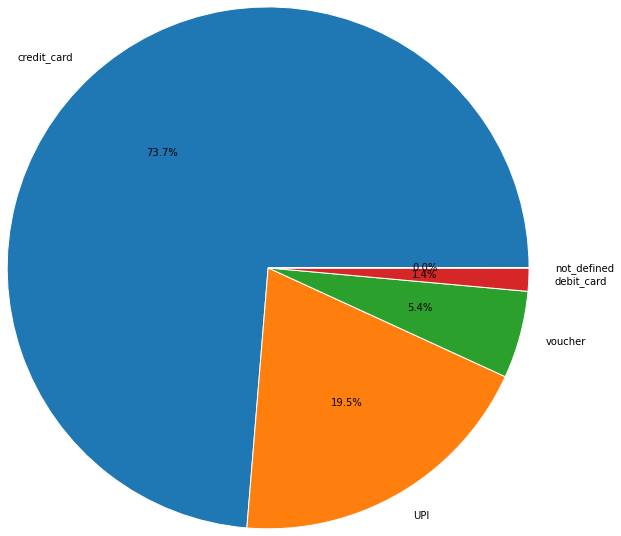

In [136]:
plt.pie(x=pp.No_customers,
        labels=['credit_card', 'UPI', 'voucher', 'debit_card','not_defined'],
        autopct='%.1f%%', wedgeprops={'edgecolor':'white'}, 
        radius=3)
plt.show()

# b. Which payment channels are used by most customers?

In [137]:
pd.DataFrame(efin.payment_type.value_counts()).reset_index().rename(
    columns={'index':'Payment_methods', 'payment_type':'No_customers'}).sort_values(
    by='No_customers', ascending=False).head(1)

,Payment_methods,No_customers
0,credit_card,87286


# 5. Customer satisfaction towards category & product

In [138]:
rev=pd.merge(left=order_review_ratings,
        right=efin,
        how='outer',
        left_on='order_id',
        right_on='order_id')

In [139]:
rev.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'year', 'month', 'week', 'day', 'time'],
      dtype='object')

# a. Which categories (top 10) are maximum rated & minimum rated?

In [140]:
top=pd.DataFrame(rev.groupby('product_category_name')['review_score'].sum()).reset_index()

In [141]:
top_10_max = top.sort_values(by='review_score', ascending=False).head(10).reset_index(drop=True)

In [142]:
top_10_max

,product_category_name,review_score
0,Bed_Bath_Table,52983
1,Health_Beauty,41318
2,Sports_Leisure,36856
3,Furniture_Decor,34407
4,Computers_Accessories,32002
5,Housewares,29854
6,Watches_Gifts,24856
7,Telephony,18612
8,Garden_Tools,18412
9,Auto,17770


In [143]:
top_10_min = top.sort_values(by='review_score', ascending=True).head(10).reset_index(drop=True)
top_10_min

,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,63
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,105
6,Diapers_And_Hygiene,127
7,Fashion_Sport,132
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,156


# b. Which products (top10) are maximum rated & minimum rated?

In [144]:
top_10_max

,product_category_name,review_score
0,Bed_Bath_Table,52983
1,Health_Beauty,41318
2,Sports_Leisure,36856
3,Furniture_Decor,34407
4,Computers_Accessories,32002
5,Housewares,29854
6,Watches_Gifts,24856
7,Telephony,18612
8,Garden_Tools,18412
9,Auto,17770


In [145]:
top_10_min

,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,63
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,105
6,Diapers_And_Hygiene,127
7,Fashion_Sport,132
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,156


# c. Average rating by location, seller, product, category, month etc.

In [146]:
rev.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'year', 'month', 'week', 'day', 'time'],
      dtype='object')

In [147]:
avg_rating=pd.DataFrame(rev.groupby([ 'customer_state', 'seller_id', 'product_category_name', 'year', 'month']
           )['review_score'].mean())
avg_rating

review_score
customer_state seller_id                        product_category_name           year month              
Andhra Pradesh 001cca7ae9ae17fb1caed9dfb1094831 Construction_Tools_Construction 2017 5          5.000000
                                                                                     6          5.000000
                                                                                     7          4.666667
                                                                                     8          4.500000
                                                                                     11         4.000000
...                                                                                                  ...
West Bengal    fa1c13f2614d7b5c4749cbc52fecda94 Watches_Gifts                   2018 6          4.000000
               fb89df7f89fd1b8f03fa2acca1ba7364 Health_Beauty                   2018 7          1.000000
               fe49ee029e61e789a1f3a5525f57ba8d Toys                            2018 2          5.000000
               fe4cd9461203cee790d36792420b310f Telephony                       2017 3          5.000000
               ffdd9f82b9a447f6f8d4b91554cc7dd3 Housewares                      2018 4          5.000000

[49424 rows x 1 columns]